<a href="https://colab.research.google.com/github/zhichunqi/Deep-Learning-HW/blob/master/Homework4_Zhichun_Qi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
from torch import nn

import numpy

import math

import matplotlib.pyplot as plt


In [6]:
torch.manual_seed(111)

In [7]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

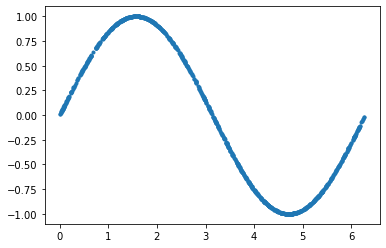

In [8]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [9]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

Implementing the Discriminator

In [10]:
class Discriminator(nn.Module):
    def __init__(self):
       super().__init__()
       self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [11]:
discriminator = Discriminator()

Implementing the Generator

In [12]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
           nn.Linear(2, 16),
           nn.ReLU(),
           nn.Linear(16, 32),
           nn.ReLU(),
           nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

Training the Models

In [13]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [14]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [15]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
 
        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.19172890484333038
Epoch: 0 Loss G.: 2.205277681350708
Epoch: 10 Loss D.: 0.6455698013305664
Epoch: 10 Loss G.: 0.8941397666931152
Epoch: 20 Loss D.: 0.6456489562988281
Epoch: 20 Loss G.: 0.8919371366500854
Epoch: 30 Loss D.: 0.6728670597076416
Epoch: 30 Loss G.: 0.8778129816055298
Epoch: 40 Loss D.: 0.6325268745422363
Epoch: 40 Loss G.: 0.702785849571228
Epoch: 50 Loss D.: 0.6204653978347778
Epoch: 50 Loss G.: 0.9101289510726929
Epoch: 60 Loss D.: 0.5522268414497375
Epoch: 60 Loss G.: 0.9904371500015259
Epoch: 70 Loss D.: 0.5903010964393616
Epoch: 70 Loss G.: 1.0225229263305664
Epoch: 80 Loss D.: 0.6235218048095703
Epoch: 80 Loss G.: 0.9041709899902344
Epoch: 90 Loss D.: 0.6744253039360046
Epoch: 90 Loss G.: 0.8965575695037842
Epoch: 100 Loss D.: 0.6881913542747498
Epoch: 100 Loss G.: 1.1556098461151123
Epoch: 110 Loss D.: 0.6485523581504822
Epoch: 110 Loss G.: 0.7771891951560974
Epoch: 120 Loss D.: 0.6140218377113342
Epoch: 120 Loss G.: 0.8845400214195251
Epoch: 13

Results


In [16]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

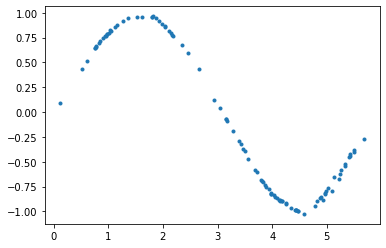

In [17]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

Handwritten Digits Generator With a GAN

In [18]:
import torchvision
import torchvision.transforms as transforms

import torch
from torch import nn

import numpy

import math

import matplotlib.pyplot as plt


In [16]:
#device = ""
#if torch.cuda.is_available():
    #device = torch.device("cuda")
#else:
    #device = torch.device("cpu")

In [19]:
torch.manual_seed(111)

Preparing the Training Data

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [21]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [22]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

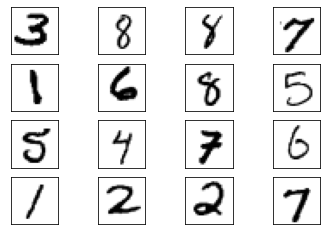

In [23]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

Implementing the Discriminator and the Generator

In [24]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [25]:
discriminator = Discriminator()

In [26]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        #x = x.view(x.size(0), 100)
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

In [27]:
generator = Generator()

Training the Models

In [28]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [29]:
latent_space_samples_plot = torch.randn((16, 100))

In [30]:
import os
if os.path.isfile('discriminator.pt') and os.path.isfile('generator.pt'):
    discriminator.load_state_dict(torch.load('./discriminator.pt'))
    generator.load_state_dict(torch.load('./generator.pt'))   
else:
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):
            # Data for training the discriminator
            real_samples = real_samples
            real_samples_labels = torch.ones((batch_size, 1))
            latent_space_samples = torch.randn((batch_size, 100))
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros(
                (batch_size, 1))
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat(
                (real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(
                output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()
        
            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 100))

            # Training the generator            
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(
                output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss
            if n == batch_size - 1:
                print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
                print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5030258893966675
Epoch: 0 Loss G.: 0.6034389734268188
Epoch: 1 Loss D.: 0.08674430102109909
Epoch: 1 Loss G.: 3.751305103302002
Epoch: 2 Loss D.: 0.012585395947098732
Epoch: 2 Loss G.: 4.828659534454346
Epoch: 3 Loss D.: 0.11376103013753891
Epoch: 3 Loss G.: 5.0646209716796875
Epoch: 4 Loss D.: 0.021278303116559982
Epoch: 4 Loss G.: 4.5632147789001465
Epoch: 5 Loss D.: 0.06566412001848221
Epoch: 5 Loss G.: 4.464053153991699
Epoch: 6 Loss D.: 0.11844757944345474
Epoch: 6 Loss G.: 5.401515960693359
Epoch: 7 Loss D.: 0.27247726917266846
Epoch: 7 Loss G.: 3.653215169906616
Epoch: 8 Loss D.: 0.10421819239854813
Epoch: 8 Loss G.: 3.5051162242889404
Epoch: 9 Loss D.: 0.30092722177505493
Epoch: 9 Loss G.: 1.9759540557861328
Epoch: 10 Loss D.: 0.2058170884847641
Epoch: 10 Loss G.: 2.2707860469818115
Epoch: 11 Loss D.: 0.3963524401187897
Epoch: 11 Loss G.: 1.8459633588790894
Epoch: 12 Loss D.: 0.3458704352378845
Epoch: 12 Loss G.: 1.9954395294189453
Epoch: 13 Loss D.: 0.41997

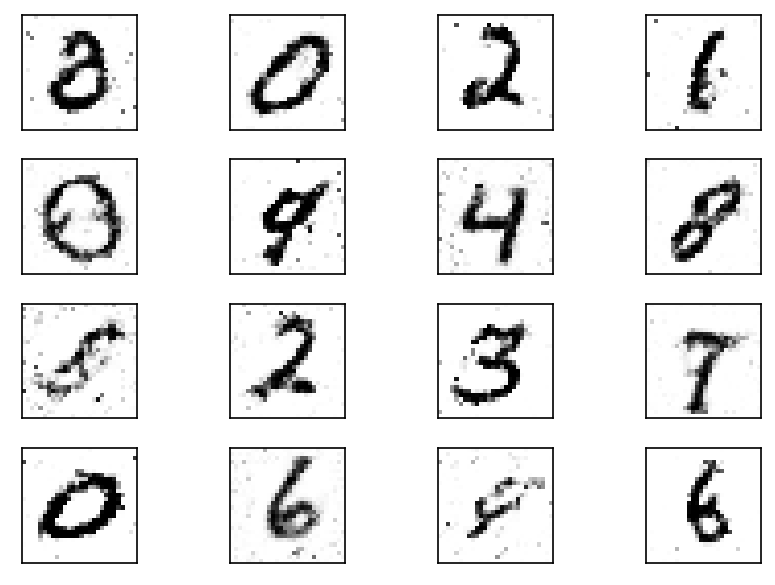

In [31]:
latent_space_samples = torch.randn(batch_size, 100)

generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.cpu().detach()

plt.figure(dpi=150)
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [ ]:
# From this code, I know how to implement the GAN model and how to build the fucntions.
# In this code, the problem is the coeffients which I calculate wrong. But I find the mistake and correct it.
# The system runs very slow and I change the runtime and it runs more faster.